In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score,recall_score,precision_recall_curve 
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Заметка
🧠 В какой ситуации что использовать?
1. MAE - Когда важны средние реальные ошибки. Например: $$$, км, баллах и т.д.
2. MSE - Когда надо сильно наказывать большие ошибки. Например: Используется в оптимизации
3. R² - Когда хочешь знать, как модель объясняет разброс Например: От 0 до 1 (лучше — ближе к 1)

df = pd.read_csv("housing.csv")

# Заметка
model.coef_[0] — это массив, но в линейной регрессии он одномерный,
так что: оставляй просто model.coef_

In [ ]:
df = pd.read_csv("housing.csv")
#1.Меняем числа в удобные значения убираем плавующую точку и окургляем другие значения
df["Price"] = df["Price"].apply(int)
df["Avg. Area Income"] = df["Avg. Area Income"].apply(int)
df["Avg. Area House Age"] = df["Avg. Area House Age"].round()
df["Avg. Area Number of Rooms"] = df["Avg. Area Number of Rooms"].round()
df["Avg. Area Number of Bedrooms"] = df["Avg. Area Number of Bedrooms"].round()
#2. Создаем переменные X,Y = Признаки, Таргет
X = df[["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Bedrooms","Area Population"]]
Y = df["Price"]
#3. Создаем тренировочные и тестовые датасеты
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size = 0.3,random_state = 0
)
#4. Создаем модель регрессии
model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
#5. Оцениваем результаты
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)
print("MAE",mae)
print("MSE",mse)
print("R2",r2)
#6 визуализация Scatter 
plt.figure(figsize = (6,4))
plt.scatter(Y_test,y_pred,color = "BLue")
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("настоящее")
plt.ylabel("Предсказание")
plt.title("настоящие vs предсказанные")
plt.show()
#7 влияние
features_name = [X.columns]
coef = model.coef_[0]
influence_df = pd.DataFrame({
    "Признаки":features_name,
    "Вес(Влияние)": coef
})
influence_df = influence_df.sort_values(by = "Вес(Влияние)",ascending = True)
#8 bar визуализация
plt.figure(figsize =(6,4))
plt.barh(X.columns,coef,color = "skyblue")
plt.xlim(15)
plt.title("BarH")
plt.xlabel("Коэффициент")
plt.grid(True)
plt.tight_layout()
plt.show()

# Заметка
🔧 Параметры PolynomialFeatures(...):


Параметр	Что делает
degree=2	Добавляет степени до 2 (x, x²)
interaction_only=True	Только взаимодействия, без x²
include_bias=False	Не добавлять колонку "1" (переменная-смещение)
🧠 Когда полезно использовать?

Если ты чувствуешь, что данные ведут себя нелинейно
Если R² в линейной регрессии низкий
Если есть предположение, что влияние не прямое

121924.32512779898 23606784253.467396 0.8174816070361806


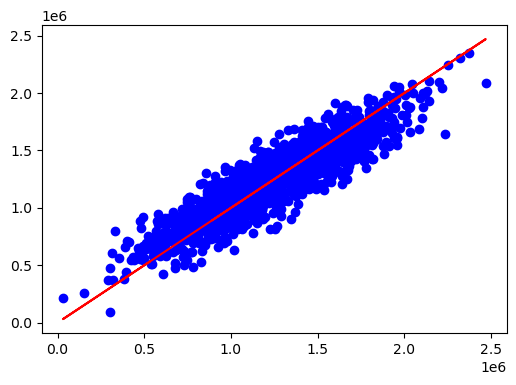

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [49]:
df["Price"] = df["Price"].apply(int)
df["Avg. Area Income"] = df["Avg. Area Income"].apply(int)
df["Avg. Area House Age"] = df["Avg. Area House Age"].round()
df["Avg. Area Number of Rooms"] = df["Avg. Area Number of Rooms"].round()
df["Avg. Area Number of Bedrooms"] = df["Avg. Area Number of Bedrooms"].round()

X = df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Bedrooms", "Area Population"]]
Y = df["Price"]

poly = PolynomialFeatures(degree = 2,include_bias = False)
X_poly = poly.fit_transform(X)


X_train_poly,X_test,Y_train,Y_test = train_test_split(
    X_poly,Y,test_size = 0.3,random_state = 0
)

model = LinearRegression()
model.fit(X_train_poly,Y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)
print(mae,mse,r2)

plt.figure(figsize = (6,4))
plt.scatter(Y_test,y_pred,color = "Blue")
plt.plot(Y_test,Y_test,color = "r")
plt.show()

df["New Price"] = df["Price"]+df["Price"]
pred = model.predict(df["New Price"])

In [47]:
df.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,New Price
0,79545,6.0,7.0,4.0,23086.80050,1059033,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",2118066
1,79248,6.0,7.0,3.0,40173.07217,1505890,"188 Johnson Views Suite 079\nLake Kathleen, CA...",3011780
2,61287,6.0,9.0,5.0,36882.15940,1058987,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",2117974
3,63345,7.0,6.0,3.0,34310.24283,1260616,USS Barnett\nFPO AP 44820,2521232
4,59982,5.0,8.0,4.0,26354.10947,630943,USNS Raymond\nFPO AE 09386,1261886
5,80175,5.0,6.0,4.0,26748.42842,1068138,"06039 Jennifer Islands Apt. 443\nTracyport, KS...",2136276
6,64698,6.0,8.0,3.0,60828.24909,1502055,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...",3004110
7,78394,7.0,7.0,2.0,36516.35897,1573936,"972 Joyce Viaduct\nLake William, TN 17778-6483",3147872
8,59927,5.0,6.0,2.0,29387.39600,798869,USS Gilbert\nFPO AA 20957,1597738
9,81885,4.0,8.0,6.0,40149.96575,1545154,Unit 9446 Box 0958\nDPO AE 97025,3090308


# Заметка
🧠 ЗАЧЕМ НУЖНА РЕГУЛЯРИЗАЦИЯ?
Ridge and Lasso
Когда у тебя:

🔹 Много признаков
🔹 Они коррелируют между собой
🔹 Или модель переобучается
→ Тогда веса (коэффициенты) начинают "скакать" и быть нестабильными
Решение — наказать модель за слишком большие веса. Это и есть регуляризация.

df["Price"] = df["Price"].apply(int)
df["Avg. Area Income"] = df["Avg. Area Income"].apply(int)
df["Avg. Area House Age"] = df["Avg. Area House Age"].round()
df["Avg. Area Number of Rooms"] = df["Avg. Area Number of Rooms"].round()
df["Avg. Area Number of Bedrooms"] = df["Avg. Area Number of Bedrooms"].round()

X = df[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Bedrooms", "Area Population"]]
Y = df["Price"]

poly = PolynomialFeatures(degree = 2,include_bias = False)
X_poly = poly.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(
    X_poly,Y,test_size = 0.3,random_state = 0
)

model_LinearRegression = LinearRegression()
model_Ridge = Ridge(alpha = 1)
model_Lasso = Lasso(alpha = 1)
model_LinearRegression.fit(X_train,Y_train)
model_Ridge.fit(X_train,Y_train)
model_Lasso.fit(X_train,Y_train)
y_pred_LinearRegression = model_LinearRegression.predict(X_test)
y_pred_Ridge = model_Ridge.predict(X_test)
y_pred_Lasso = model_Lasso.predict(X_test)

mae_LinearRegression = mean_absolute_error(Y_test,y_pred_LinearRegression)
mse_LinearRegression = mean_squared_error(Y_test,y_pred_LinearRegression)
r2_LinearRegression = r2_score(Y_test,y_pred_LinearRegression)

mae_Ridge = mean_absolute_error(Y_test,y_pred_Ridge)
mse_Ridge = mean_squared_error(Y_test,y_pred_Ridge)
r2_Ridge = r2_score(Y_test,y_pred_Ridge)

mae_Lasso = mean_absolute_error(Y_test,y_pred_Lasso)
mse_Lasso = mean_squared_error(Y_test,y_pred_Lasso)
r2_Lasso = r2_score(Y_test,y_pred_Lasso)

print(f"Регрессія:",mae_LinearRegression,mse_LinearRegression,r2_LinearRegression)
print(f"Ridge:",mae_Ridge,mse_Ridge,r2_Ridge)
print(f"Lasso:",mae_Lasso,mse_Lasso,r2_Lasso)

df2 = pd.DataFrame.from_dict({"MODEL":["Linear","Ridge","Lasso"],"MAE":[121924.32512779898,121928.02959781089,121924.22313981509],"MSE":[23606784253.467396,23609345473.430458,23606798136.86354],"R2":[0.8174816070361806,0.8174618046884035,0.8174814996952091]})
df2.head(3)

plt.figure(figsize=(6, 4))
plt.bar(df2["MODEL"], df2["R2"], color=["blue", "green", "orange"])
plt.title("Сравнение R² для моделей")
plt.ylabel("R² Score")
plt.ylim(0.8174, 0.8176)  # диапазон поближе к твоим значениям
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Заметка

Что такое RidgeCV? 
Ridge-модель с встроенным кросс-валидационным подбором alpha

🔍 Что такое GridSearchCV?

Это способ перебрать все возможные значения параметров модели (например, alpha в Ridge), чтобы найти:

🔥 Лучшее сочетание параметров, дающее максимум точности.
Допустим, ты хочешь найти лучший alpha для Ridge:
Ты даёшь это GridSearchCV, и он:

Подставляет каждое значение
Обучает модель на подвыборках (см. ниже 👇)
Сравнивает метрики (R², MSE, MAE...)
Выбирает самое лучшее

🔁 Что такое кросс-валидация (CV)?
Например, cv=5 значит:
Разделим выборку на 5 кусков. Обучим на 4, проверим на 1. Потом повторим 5 раз, каждый раз меняя кусок.
📌 Это предохраняет от переобучения и даёт стабильную оценку.


Что значит .best_score_?
Если ты ищешь scoring="r2", то .best_score_ = максимальный средний R²
✅ В итоге ты получаешь:

📊 Статистически обоснованное значение alpha
💪 Устойчивую к переобучению модель
🎯 Чёткую метрику, которую можно доверять
Это способ разбить данные на несколько частей и проверить модель в разных "сценариях":

# Заметка 
SelectKBest | Выбирает k лучших признаков по статистике (f_regression)
RFE | Рекурсивно удаляет признаки, оставляя только важные
LassoCV | Использует L1-регуляризацию, чтобы автоматически обнулять ненужные признаки

🔍 1. SelectKBest

📌 Принцип:
Он оценивает каждый признак по отдельности, насколько он связан с целевой переменной (в регрессии — через f_regression, то есть корреляцию).

📦 Ты выбираешь k лучших признаков — например, топ-3, топ-5 и т.д.

2. RFE — Recursive Feature Elimination

📌 Принцип:
Он использует модель (например, линейную регрессию) и пошагово удаляет наименее важный признак, пока не останется нужное количество.

✂️ 3. LassoCV — L1-регуляризация с автоподбором alpha

📌 Принцип:
Модель сама обнуляет веса у ненужных признаков.
То есть нужные признаки получают вес ≠ 0, а мусор — обнуляется.

In [74]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [77]:
df.shape

(918, 12)

# Заметка
KNeighborsClassifier() — модель ближайших соседей, смотрит на соседние точки, чтобы предсказать класс
RandomForestClassifier() — ансамблевая модель, обучает кучу деревьев и голосует

# Заметка
## 🔺 А теперь про ROC-AUC (кратко):

### 🎯 ROC-AUC = метрика для бинарной классификации, особенно когда классы несбалансированы

ROC-кривая - Это график показывает насколько хорошо модель отделяет классы?
AUC - Это площадь под кривой от 0 до 1. Чем ближе к 1 — тем лучше.
### 🧠 Представь:

У тебя модель, которая предсказывает: “есть болезнь” или “нет”
Для каждого пациента модель говорит:
“я на 89% уверен, что у него болезнь”
“я на 22% уверен, что нет”
📌 В ROC нас интересует не просто правильность (accuracy), а:

Насколько высоко модель ранжирует “1” по сравнению с “0”
### 📐 Ось ROC-кривой:

X (FPR) - False Positive Rate (ложные тревоги),
Y (TPR) - True Positive Rate (чувствительность),
### 🏆 AUC (Area Under Curve):
1.0 - Идеальное разделение (классы разделяются чётко),
0.9–0.99 - Отличная модель,
0.8–0.9	- Хорошая,
0.7–0.8	- Ок, но можно лучше,
0.5	- Хуже — это как гадать монеткой 😐,
### 📌 Отличие от accuracy:

accuracy — просто сколько правильно
roc-auc — насколько модель уверенно и правильно отделяет 0 от 1

# Заметка
## 🔷 Что такое КЛАСТЕРИЗАЦИЯ?

Это неподконтрольное машинное обучение (unsupervised learning) — то есть без целевой переменной (без Y).

📌 Цель:

Разделить объекты (людей, товары, тексты) на группы (кластеры) по схожим признакам.
## 📦 Основные алгоритмы кластеризации:



KMeans - Разбивает данные на K кластеров, минимизируя расстояние до центра.
DBSCAN - Находит плотные группы, игнорируя выбросы.
Hierarchical - Создаёт древо кластеров (как семейное дерево).

## 🧪 Что важно при кластеризации:

📊 Данные нужно масштабировать (StandardScaler)
🎯 Ты сам выбираешь K — число кластеров
📉 Метрика — Silhouette score, Inertia (расстояние)

In [116]:
df = pd.read_csv("Mall_Customers.csv")